In [9]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import load
import os
import PIL
import tensorflow as tf
import pandas as pd

from tensorflow import keras
from keras import layers, datasets, models
from keras.models import Sequential

import pickle
from PIL import Image

In [2]:
#Loading data from .npz files

a1 = np.load('kmnist-train-imgs.npz')['arr_0']
a2 = np.load('kmnist-train-labels.npz')['arr_0']
a3 = np.load('kmnist-test-imgs.npz')['arr_0']
a4 = np.load('kmnist-test-labels.npz')['arr_0']

merged_dataset = [a1,a2,a3,a4]
#np.savez('output_dataset.npz',merged_dataset)


/Users/nickhankins/miniforge3/envs/tensorflow/lib/python3.8/site-packages/numpy/lib/npyio.py:719: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


In [16]:
##Splitting the data

train_imgs, train_labels, test_imgs, test_labels = merged_dataset

#Test array shapes with print statements below
print('X_train: ' + str(train_imgs.shape))
print('Y_train: ' + str(train_labels.shape))
print('X_test:  '  + str(test_imgs.shape))
print('Y_test:  '  + str(test_labels.shape))

##Normalizing the data
train_imgs = train_imgs.astype('float32')
test_imgs = test_imgs.astype('float32')
train_imgs, test_imgs = train_imgs / 255.0, test_imgs / 255.0

train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = keras.utils.to_categorical(test_labels, num_classes=10)


X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [20]:
#Creating input dimension and initial layers

img_rows, img_cols = 28, 28

train_imgs = train_imgs.reshape(train_imgs.shape[0], img_rows, img_cols, 1)
test_imgs = test_imgs.reshape(test_imgs.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

classes = ["お", "き", "す", "つ", "な", "は", "ま", "や", "れ", "を"]

model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation='relu',input_shape=input_shape))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))


In [21]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 dense_3 (Dense)             (None, 26, 26, 10)        330       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 10)       0         
 2D)                                                             
                                                                 
Total params: 650
Trainable params: 650
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.add(layers.Dense(10, activation='softmax'))

In [23]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 dense_3 (Dense)             (None, 26, 26, 10)        330       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1690)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                108224    
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                      

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

history = model.fit(train_imgs, train_labels, epochs=2, 
                    validation_data=(test_imgs, test_labels))

Epoch 1/2


2022-04-04 10:00:00.160111: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1874/1875 [============================>.] - ETA: 0s - loss: 0.3520 - accuracy: 0.8930

2022-04-04 10:00:18.993980: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 22s 11ms/step - loss: 0.3519 - accuracy: 0.8930 - val_loss: 0.4158 - val_accuracy: 0.8780
Epoch 2/2
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1238 - accuracy: 0.9629 - val_loss: 0.3231 - val_accuracy: 0.9060


313/313 - 2s - loss: 0.3231 - accuracy: 0.9060 - 2s/epoch - 7ms/step


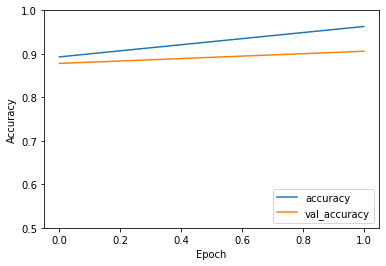

In [27]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_imgs, test_labels, verbose=2)

In [4]:
b1 = np.load('k49-train-imgs.npz')['arr_0']
b2 = np.load('k49-train-labels.npz')['arr_0']
b3 = np.load('k49-test-imgs.npz')['arr_0']
b4 = np.load('k49-test-labels.npz')['arr_0']

merged_dataset_1 = [b1,b2,b3,b4]

train_imgs_1, train_labels_1, test_imgs_1, test_labels_1 = merged_dataset_1

#Test array shapes with print statements below
print('X_train: ' + str(train_imgs_1.shape))
print('Y_train: ' + str(train_labels_1.shape))
print('X_test:  '  + str(test_imgs_1.shape))
print('Y_test:  '  + str(test_labels_1.shape))



X_train: (232365, 28, 28)
Y_train: (232365,)
X_test:  (38547, 28, 28)
Y_test:  (38547,)


In [6]:
##Normalizing the data
train_imgs_1 = train_imgs_1.astype('float32')
test_imgs_1 = test_imgs_1.astype('float32')
train_imgs_1, test_imgs_1 = train_imgs_1 / 255.0, test_imgs_1 / 255.0

train_labels_1 = tf.keras.utils.to_categorical(train_labels_1, num_classes=49)
test_labels_1 = keras.utils.to_categorical(test_labels_1, num_classes=49)

#Shaping the data

img_rows, img_cols = 28, 28

train_imgs_1 = train_imgs_1.reshape(train_imgs_1.shape[0], img_rows, img_cols, 1)
test_imgs_1 = test_imgs_1.reshape(test_imgs_1.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [5]:

model_1 = models.Sequential()
model_1.add(layers.Conv2D(32, 3, activation='relu',input_shape=input_shape))
model_1.add(layers.Dense(49, activation='relu'))
model_1.add(layers.MaxPooling2D(pool_size=(2, 2)))

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-04-20 17:37:03.408418: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-20 17:37:03.408746: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 dense (Dense)               (None, 26, 26, 49)        1617      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 49)       0         
 )                                                               
                                                                 
Total params: 1,937
Trainable params: 1,937
Non-trainable params: 0
_________________________________________________________________


In [7]:
model_1.add(layers.Flatten())
model_1.add(layers.Dense(64, activation='relu'))
model_1.add(layers.Dense(49))
model_1.add(layers.Dense(49, activation='softmax'))

In [8]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 dense (Dense)               (None, 26, 26, 49)        1617      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 49)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8281)              0         
                                                                 
 dense_1 (Dense)             (None, 64)                530048    
                                                                 
 dense_2 (Dense)             (None, 49)                3185      
                                                        

In [9]:
model_1.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

history = model_1.fit(train_imgs_1, train_labels_1, epochs=2, 
                    validation_data=(test_imgs_1, test_labels_1))

Epoch 1/2


2022-04-20 17:42:25.810835: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


   1/7262 [..............................] - ETA: 56:25 - loss: 3.8831 - accuracy: 0.0312

2022-04-20 17:42:26.159552: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7262/7262 [==============================] - ETA: 0s - loss: 0.5724 - accuracy: 0.8491

2022-04-20 17:44:12.831650: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7262/7262 [==============================] - 115s 16ms/step - loss: 0.5724 - accuracy: 0.8491 - val_loss: 0.6634 - val_accuracy: 0.8271
Epoch 2/2
7262/7262 [==============================] - 112s 15ms/step - loss: 0.2730 - accuracy: 0.9249 - val_loss: 0.5612 - val_accuracy: 0.8603


1205/1205 - 8s - loss: 0.5612 - accuracy: 0.8603 - 8s/epoch - 7ms/step


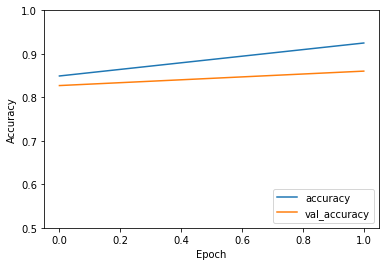

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss_1, test_acc_1 = model_1.evaluate(test_imgs_1, test_labels_1, verbose=2)

In [15]:
#with open('trained_classifier.pickle', 'wb') as f:
#    pickle.dump(model_1, f)

k49_trained_model = pickle.load(open('trained_classifier.pickle', 'rb'))
k49_trained_model.predict(test_imgs_1)


2022-04-21 10:32:00.523306: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[5.8861547e-06, 1.1713848e-03, 5.0504814e-04, ..., 9.1631694e-07,
        1.0855213e-03, 8.2215989e-01],
       [5.8833666e-06, 1.1719730e-03, 5.0468853e-04, ..., 9.1574492e-07,
        1.0865215e-03, 8.2209325e-01],
       [5.8757105e-06, 1.1710539e-03, 5.0469319e-04, ..., 9.1401051e-07,
        1.0847957e-03, 8.2209551e-01],
       ...,
       [5.8828773e-06, 1.1715571e-03, 5.0455611e-04, ..., 9.1622087e-07,
        1.0858229e-03, 8.2209003e-01],
       [5.8458513e-06, 1.1673153e-03, 5.0305575e-04, ..., 9.0770209e-07,
        1.0815284e-03, 8.2232201e-01],
       [5.8565215e-06, 1.1687736e-03, 5.0374976e-04, ..., 9.1063782e-07,
        1.0830821e-03, 8.2224303e-01]], dtype=float32)

In [23]:
##Below is the data from one of the first tests

#history.history variable from model_1

dict_results = open('classifierresults_1.pickle', 'rb')
results = pickle.load(dict_results)
print(results)

{'loss': [0.5724263787269592, 0.2729821503162384], 'accuracy': [0.8491167426109314, 0.9249327778816223], 'val_loss': [0.663377583026886, 0.5611956119537354], 'val_accuracy': [0.8270682692527771, 0.8602744936943054]}


In [23]:
## Loading handwritten image and using transfer learning to predict the outcome
## of image on trained model

handwritten_img = Image.open('ku.jpg')
handwritten_img = np.resize(handwritten_img, (28,28,1))
img_to_arr = np.array(handwritten_img)
img_to_arr = img_to_arr.reshape(1,28,28,1)
handwritten_pred = k49_trained_model.predict(img_to_arr)
print(handwritten_pred.shape)
print(handwritten_pred)

(1, 49)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1.]]
